In [1]:
%load_ext Cython

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import time

from tqdm import tqdm
from scipy.special import erfc
from scipy import stats

from cycler import cycler
import boost_histogram as bh

import warnings
warnings.filterwarnings('ignore')

from lmfit.models import *
from lmfit import Model

import inspect

In [3]:
df = pd.read_pickle("/Users/tylern/Desktop/show/plots/yeilds.pkl")

w_bins = pd.unique(df.w)
q2_bins = pd.unique(df.q2)
cos_t_bins = pd.unique(df.cos_t)

for b in range(10):
    df[f'acc_{b}'] = df[f'data_{b}'] * (df[f'mc_rec_{b}']/df[f'thrown_{b}'])
df = df[['w', 'q2', 'cos_t', 'acc_0', 'acc_1', 'acc_2', 'acc_3', 'acc_4', 'acc_5', 'acc_6', 'acc_7', 'acc_8', 'acc_9']]

df.head()

,w,q2,cos_t,acc_0,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7,acc_8,acc_9
0,"(1.275, 1.3]","(1.8, 2.6]","(0.8, 1.0]",232.234632,201.370867,219.624191,263.040213,322.030399,301.599096,257.263808,206.988813,187.671750,237.765109
1,"(1.275, 1.3]","(1.8, 2.6]","(-0.8, -0.6]",4.540541,15.012932,54.235530,35.800650,23.767973,24.786432,23.741169,57.038388,13.268248,5.466794
2,"(1.275, 1.3]","(1.8, 2.6]","(0.4, 0.6]",59.646435,55.766905,103.388897,143.536891,216.765941,211.733668,149.859516,103.907255,49.242469,64.328946
3,"(1.275, 1.3]","(1.8, 2.6]","(-0.6, -0.4]",8.346815,23.114761,91.207816,38.840117,45.607361,51.956371,42.948573,104.872724,31.624315,8.011060
4,"(1.275, 1.3]","(1.8, 2.6]","(0.6, 0.8]",132.476662,93.413932,116.642150,202.704564,261.967734,267.329328,200.495557,137.705500,91.741266,134.354412


In [4]:
def virtual_photon(W: float, Q2: float, beam_energy: float = 4.81726) -> float:
    MASS_E = 0.000511
    target_mass = 0.93827203
    FS_ALPHA = 0.007297352570866302

    one = FS_ALPHA/(4*np.pi*Q2)
    two = W/(beam_energy**2 * target_mass**2)

    epsilon = 2*(1)
    epsilon = 1/epsilon
    three = (W**2 - target_mass**2)/(1 - epsilon)

    flux = one * two * three
    return flux

In [13]:
def acceptence_corrected(yeilds):
    acc_corr = dict()
    for ws in w_bins[:3]:
        for q2s in q2_bins[:3]:
            for cos_ts in cos_t_bins[:3]:
                cut = (yeilds.w == ws) & (yeilds.q2 == q2s) & (yeilds.cos_t == cos_ts)
                data = yeilds[cut].copy()
                x = []
                y = []
                for b, phi in enumerate(np.linspace(0,2*np.pi,10)):
                    x.append(phi)
                    y.append(data[f'acc_{b}'] * virtual_photon(ws.left, q2s.left))
                    
                plt.scatter(x,y)
                plt.ylim(0, 0.02)
                plt.show()

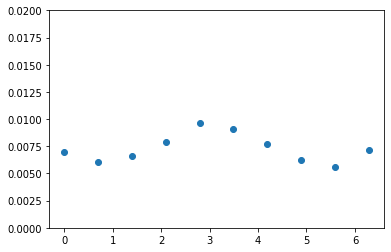

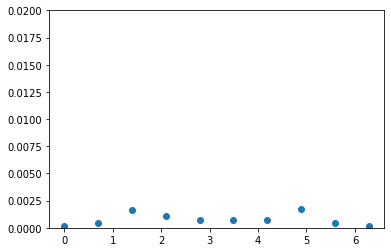

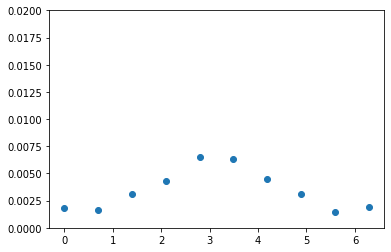

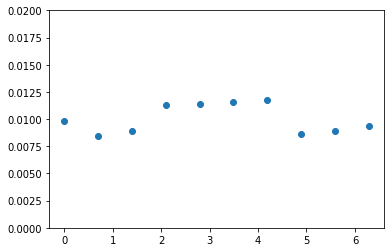

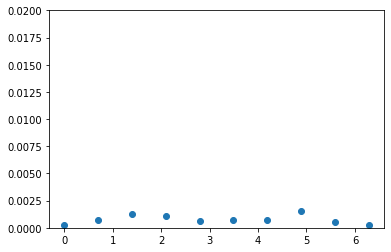

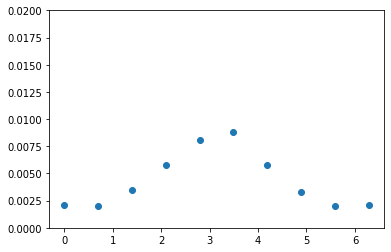

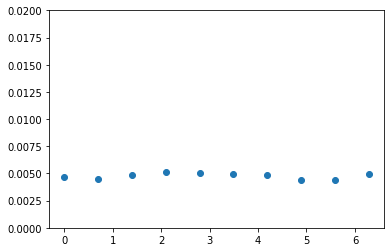

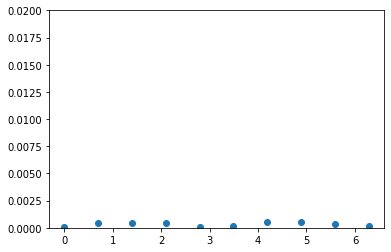

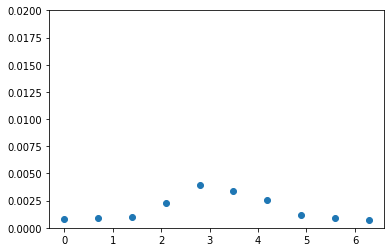

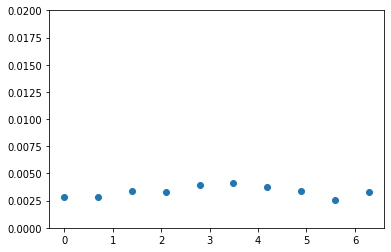

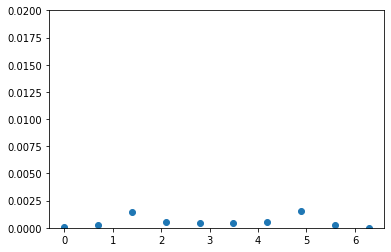

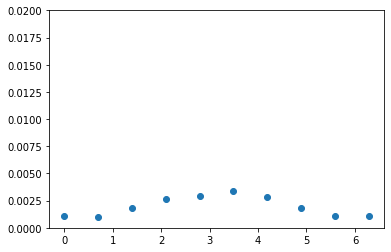

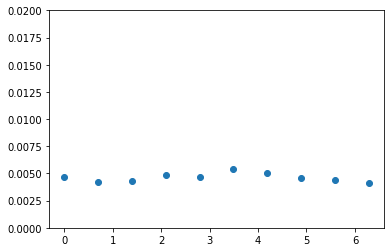

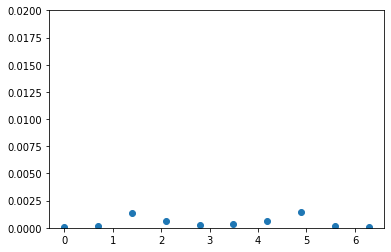

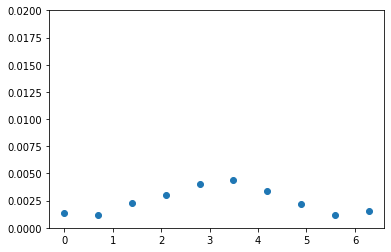

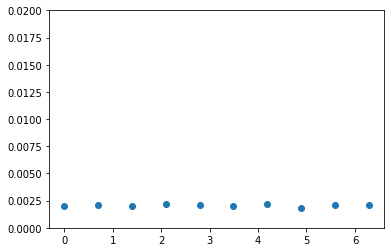

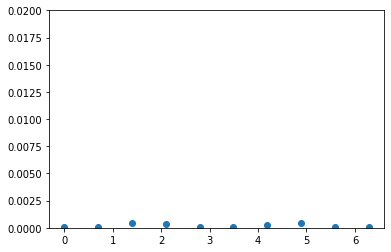

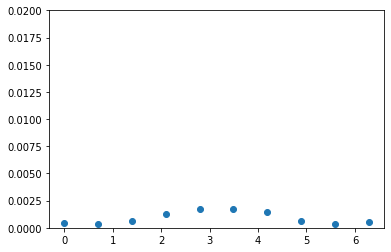

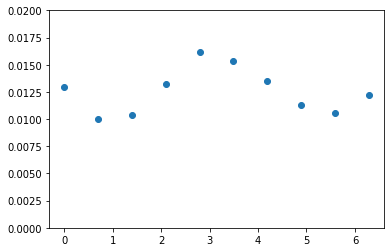

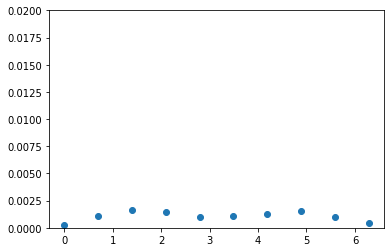

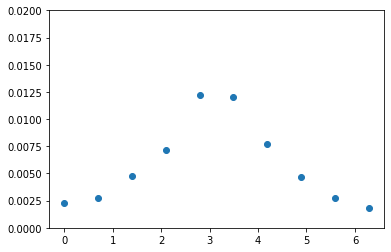

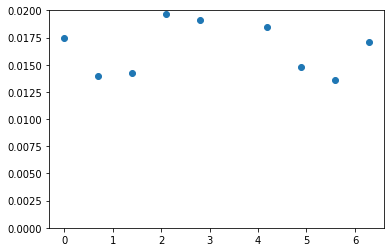

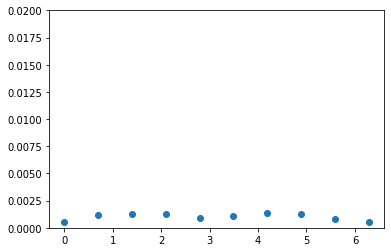

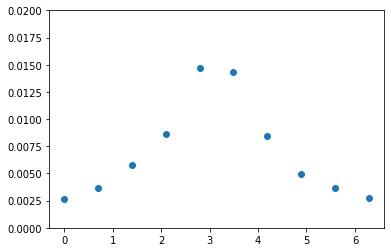

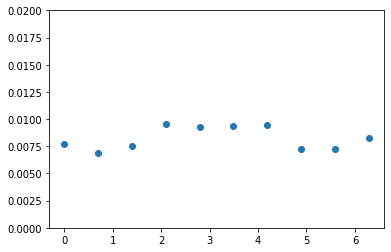

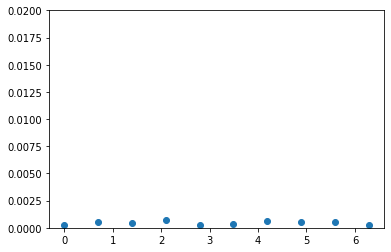

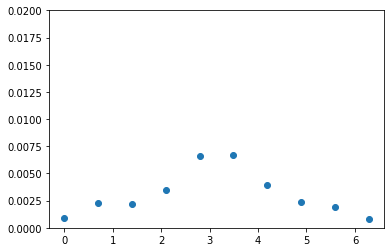

In [14]:
acceptence_corrected(df)